# 📊 Análise de Inadimplência Escolar.

Este notebook realiza uma análise exploratória simples sobre a inadimplência de alunos com base em uma base simulada, diferenciando formas de pagamento, turmas e evolução mensal.



In [9]:
## Importação

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
plt.style.use('default')
sns.set_palette("pastel")


In [10]:
## Ler dados de um arquivo csv

df = pd.read_csv("inadimplencia_escola.csv")
df.head()


,ID_Aluno,Nome,Turma,Forma_Pagamento,Mes_Referencia,Valor_Mensalidade,Pago,Data_Pagamento
0,1001,Ana Souza,3ºA,Boleto,2025-03,750.0,Sim,2025-03-10
1,1002,Lucas Oliveira,2ºB,Cartão,2025-03,720.0,Não,NaN
2,1003,Carla Lima,1ºC,Boleto,2025-03,700.0,Sim,2025-03-05
3,1001,Ana Souza,3ºA,Boleto,2025-04,750.0,Sim,2025-04-10
4,1002,Lucas Oliveira,2ºB,Cartão,2025-04,720.0,Não,NaN


In [11]:
df["Data_Pagamento"] = pd.to_datetime(df["Data_Pagamento"], errors='coerce')
df["Status"] = df["Pago"].apply(lambda x: "Inadimplente" if x == "Não" else "Em dia")
df.head()


,ID_Aluno,Nome,Turma,Forma_Pagamento,Mes_Referencia,Valor_Mensalidade,Pago,Data_Pagamento,Status
0,1001,Ana Souza,3ºA,Boleto,2025-03,750.0,Sim,2025-03-10,Em dia
1,1002,Lucas Oliveira,2ºB,Cartão,2025-03,720.0,Não,NaT,Inadimplente
2,1003,Carla Lima,1ºC,Boleto,2025-03,700.0,Sim,2025-03-05,Em dia
3,1001,Ana Souza,3ºA,Boleto,2025-04,750.0,Sim,2025-04-10,Em dia
4,1002,Lucas Oliveira,2ºB,Cartão,2025-04,720.0,Não,NaT,Inadimplente


In [12]:
inadimplencia_por_turma = df[df["Status"] == "Inadimplente"].groupby("Turma").size().reset_index(name="Total_Inadimplentes")
inadimplencia_por_mes = df[df["Status"] == "Inadimplente"].groupby("Mes_Referencia").size().reset_index(name="Total_Inadimplentes")

In [13]:
inadimplencia_por_turma

,Turma,Total_Inadimplentes
0,1ºC,1
1,2ºB,3
2,3ºA,1


In [14]:
inadimplencia_por_mes 

,Mes_Referencia,Total_Inadimplentes
0,2025-03,1
1,2025-04,2
2,2025-05,2


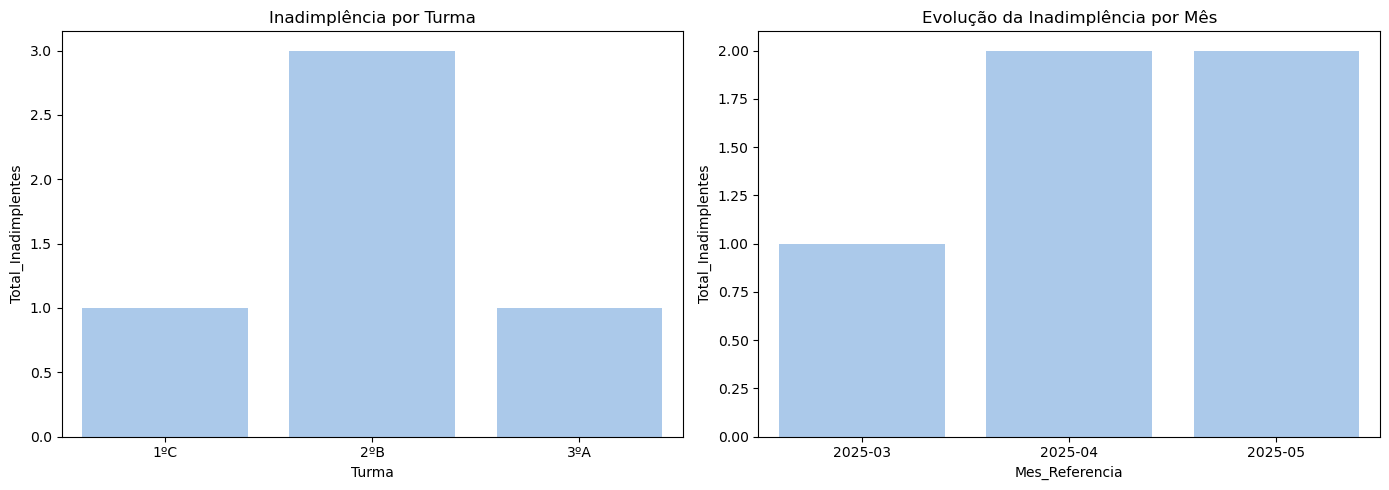

In [15]:
plt.figure(figsize=(14, 5))

# Gráfico 1
plt.subplot(1, 2, 1)
sns.barplot(x="Turma", y="Total_Inadimplentes", data=inadimplencia_por_turma)
plt.title("Inadimplência por Turma")

# Gráfico 2
plt.subplot(1, 2, 2)
sns.barplot(x="Mes_Referencia", y="Total_Inadimplentes", data=inadimplencia_por_mes)
plt.title("Evolução da Inadimplência por Mês")

plt.tight_layout()
plt.show()


In [29]:
inadimplencia_por_nome = (
    df[df["Status"] == "Inadimplente"]
    .groupby("Nome")
    .size()
    .reset_index(name="Meses em atrasos")
    .sort_values("Meses em atrasos", ascending=False)
)

inadimplencia_por_nome

,Nome,Meses em atrasos
2,Lucas Oliveira,3
0,Ana Souza,1
1,Carla Lima,1
